In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%autoreload 2

In [6]:
from graph import *

In [112]:
import numpy as np
import networkx as nx
from networkx.algorithms import approximation as apxa
import matplotlib.pyplot as plt
import copy
import dgl
import torch.nn.functional as F

[[0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]]


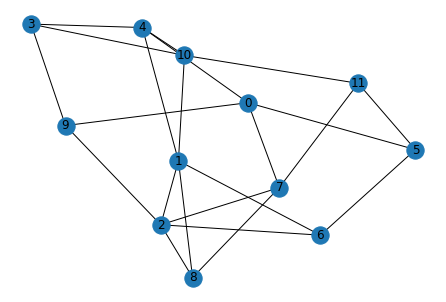

In [16]:
n = 12
p = 0.3
GRandom = nx.fast_gnp_random_graph(n, p, seed=None, directed=False)
nx.draw(GRandom,with_labels = True)
adjmatrix = nx.to_numpy_array(GRandom)
print(adjmatrix)

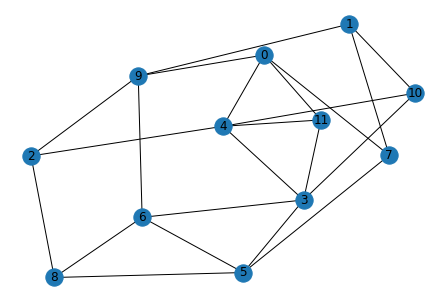

In [17]:
G = Graph(adjmatrix)
tmp = G.getGraph()
nx.draw(tmp,with_labels = True)
plt.show()

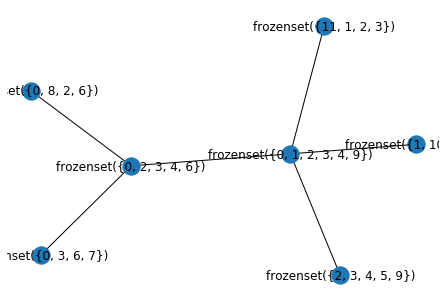

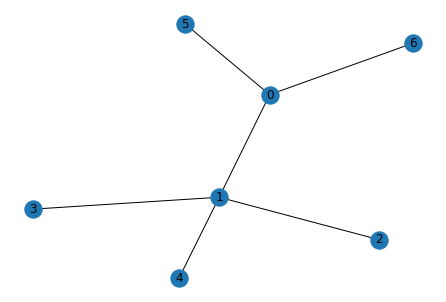

****************************************
Label of the supernode: 0
Nodes inside supernode: [0, 1, 2, 3, 4]
Shared and New Nodes:  {'shared': set(), 'newNodes': {0, 1, 2, 3, 4}}
Adjacents: [1, 6, 5]
This node is root of the tree
Children list: [1, 6, 5]
Canonical Name: 11101010010100
Canonical Name Sorted By Label: 11101010010100
****************************************
****************************************
Label of the supernode: 1
Nodes inside supernode: [0, 1, 2, 3, 5, 6]
Shared and New Nodes:  {'shared': {0, 1, 2, 3}, 'newNodes': {5, 6}}
Adjacents: [3, 0, 4, 2]
Parent: 0
Children list: [4, 3, 2]
Canonical Name: 11010100
Canonical Name Sorted By Label: 11010100
****************************************
****************************************
Label of the supernode: 2
Nodes inside supernode: [0, 1, 5, 7]
Shared and New Nodes:  {'shared': {0, 1, 5}, 'newNodes': {7}}
Adjacents: [1]
Parent: 1
Children list: []
Canonical Name: 10
Canonical Name Sorted By Label: 10
*********************

In [18]:
T = G.getDecompositionTree()
type(T)
T.showTree(printNodes=True, showInitialTree=True)

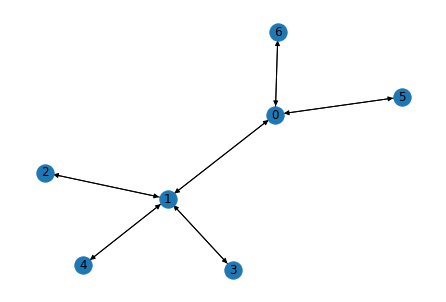

In [19]:
DGLT = dgl.DGLGraph(T.getSimpleTree())
nx.draw(DGLT.to_networkx(), with_labels=True)

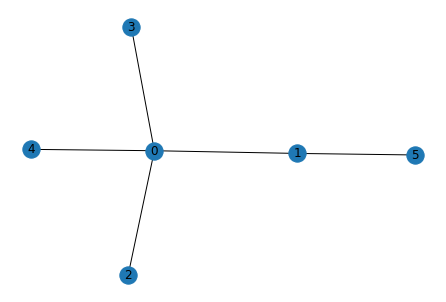

In [55]:
G.reOrder()
tmp = G.getGraph()
nx.draw(tmp,with_labels = True)
plt.show()

****************************************
Label of the supernode: 4
Nodes inside supernode: [1, 5]
Shared and New Nodes:  {'shared': [1], 'newNodes': [5]}
Adjacents: [0]
Parent: 0
Children list: []
Canonical Name: 10
Canonical Name Sorted By Label: 10
****************************************


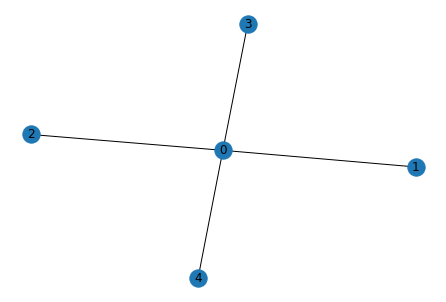

In [67]:
c = G.getClusterData(4)
c['sn'].printInformation()
nx.draw(c['Gi'], with_labels = True)

In [36]:
import numpy as np
import dgl
import torch

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0.]]


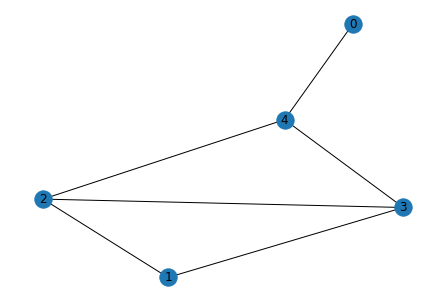

In [31]:
n = 5
p = 0.4
GRandom = nx.fast_gnp_random_graph(n, p, seed=None, directed=False)
nx.draw(GRandom,with_labels = True)
adjmatrix = nx.to_numpy_array(GRandom)
print(adjmatrix)

In [32]:
dglGi = dgl.DGLGraph(GRandom)

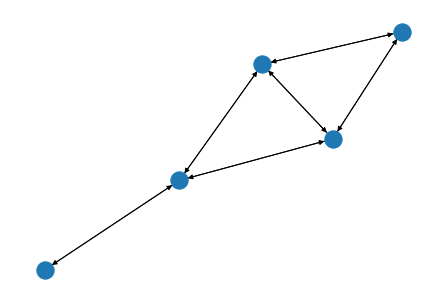

In [34]:
nx.draw(dgl.to_networkx(dglGi))

In [37]:
dglGi.ndata['a'] = torch.tensor(nx.to_numpy_array(GRandom))

# Testing tree decomposition:

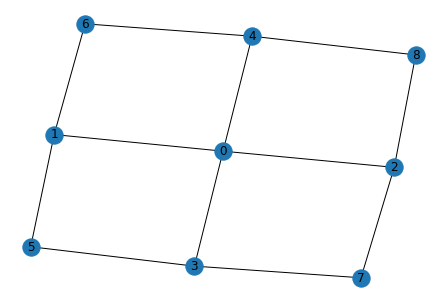

first tree:
frozenset({0, 2, 3, 4})
frozenset({0, 1, 3, 4})
frozenset({8, 2, 4})
frozenset({2, 3, 7})
frozenset({1, 4, 6})
frozenset({1, 3, 5})


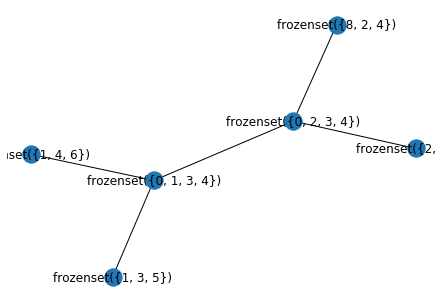

In [195]:
G = Graph(AdjMatrix=None, nxGraph=nx.grid_2d_graph(3,3))

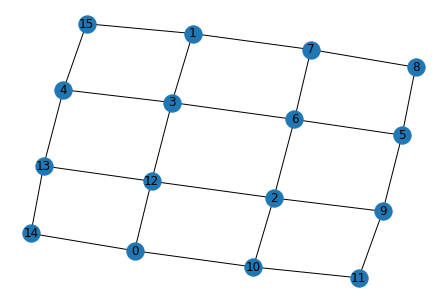

In [192]:
nx.draw(G.G, with_labels=True)

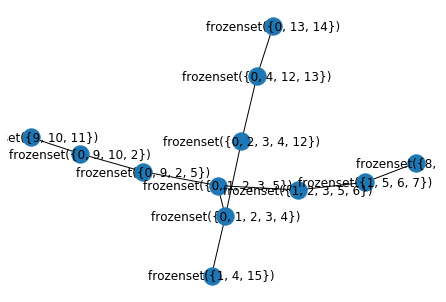

In [174]:
G.T.showTree()